In [1]:
import glob
import csv
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import numpy as np
from numpy.random import RandomState
np.random.seed(1)

In [2]:
flist = glob.glob("train/*.asm")

In [3]:
num_samples = len(flist)
print("Number of samples: %i" %(num_samples))

Number of samples: 10868


In [4]:
flist

['train/0mgFnqeLAMr7jthUYRTv.asm',
 'train/4EnNLux3rOG8i0W9DBVf.asm',
 'train/aBzIwsiXPGYFxKEgOu2q.asm',
 'train/grbAvIxKkFeLica6D2QJ.asm',
 'train/HaWuY5IXN7gOmJG4ZCkd.asm',
 'train/C0zcsP1IiGEXyLkx6bp2.asm',
 'train/IZeQVP4mMEwxvrzfUd6R.asm',
 'train/iwKlT6Fh3qfXp2kdVS7a.asm',
 'train/4syoiE9gr1HVtAfwTQY8.asm',
 'train/hTWBq5QXgOm0eKV9ktRu.asm',
 'train/9zbitD6NE10I4FjdgJvV.asm',
 'train/IpiH1PbUFYZwRWe2jl5t.asm',
 'train/JhBYHQsTMGWqaf24Ou0p.asm',
 'train/2UcBWPt6mf8dohDsYxOR.asm',
 'train/0uNkt6sirCnUWw175pjl.asm',
 'train/iks3Y5jQmILCpn8O6wR7.asm',
 'train/auQidPmlt1NneSZ7FRjs.asm',
 'train/3Isqvz4GW6LAxUaZP7f0.asm',
 'train/euLEGg3lHfAIJz9dvyqa.asm',
 'train/av7Nljxu5MQ3q1b9roUk.asm',
 'train/c7LBl4CN0AQdheFin9v8.asm',
 'train/7dNt3WEY0kxjshoeLAw5.asm',
 'train/GKdvW298FpuQAamNZlqn.asm',
 'train/hQ3EP5rHNeKgWXGIaZUC.asm',
 'train/gC6s297ohTDUNO3IzpKM.asm',
 'train/h2cdZou5ylgEQaUiJvSD.asm',
 'train/8Tvltu5MUWOfgNsSnKi3.asm',
 'train/1LE6uK9BdgNXIcSTnrMJ.asm',
 'train/hl6kTIUWGfd9

In [5]:
x86instructions = ['aaa','aad','aam','aas','adc','adcx','add','addpd','addps','addsd','addss','addsubpd','addsubps','adox','aesdec','aesdeclast','aesenc','aesenclast','aesimc','aeskeygenassist','and','andn','andnpd','andnps','andpd','andps','arpl','bextr','blendpd','blendps','blendvpd','blendvps','blsi','blsmsk','blsr','bound','bsf','bsr','bswap','bt','btc','btr','bts','bzhi','call','cbw','cdq','cdqe','clac','clc','cld','clflush','cli','clts','cmc','cmovcc','cmp','cmppd','cmpps','cmps','cmpsb','cmpsd','cmpsq','cmpss','cmpsw','cmpxchg','cmpxchg16b','cmpxchg8b','comisd','comiss','cpuid','cqo','crc32','cvtdq2pd','cvtdq2ps','cvtpd2dq','cvtpd2pi','cvtpd2ps','cvtpi2pd','cvtpi2ps','cvtps2dq','cvtps2pd','cvtps2pi','cvtsd2si','cvtsd2ss','cvtsi2sd','cvtsi2ss','cvtss2sd','cvtss2si','cvttpd2dq','cvttpd2pi','cvttps2dq','cvttps2pi','cvttsd2si','cvttss2si','cwd','cwde','daa','das','dec','div','divpd','divps','divsd','divss','dppd','dpps','emms','enter','extractps','f2xm1','fabs','fadd','faddp','fbld','fbstp','fchs','fclex','fcmovcc','fcom','fcomi','fcomip','fcomp','fcompp','fcos','fdecstp','fdiv','fdivp','fdivr','fdivrp','ffree','fiadd','ficom','ficomp','fidiv','fidivr','fild','fimul','fincstp','finit','fist','fistp','fisttp','fisub','fisubr','fld','fld1','fldcw','fldenv','fldl2e','fldl2t','fldlg2','fldln2','fldpi','fldz','fmul','fmulp','fnclex','fninit','fnop','fnsave','fnstcw','fnstenv','fnstsw','fpatan','fprem','fprem1','fptan','frndint','frstor','fsave','fscale','fsin','fsincos','fsqrt','fst','fstcw','fstenv','fstp','fstsw','fsub','fsubp','fsubr','fsubrp','ftst','fucom','fucomi','fucomip','fucomp','fucompp','fwait','fxam','fxch','fxrstor','fxsave','fxtract','fyl2x','fyl2xp1','haddpd','haddps','hlt','hsubpd','hsubps','idiv','imul','in','inc','ins','insb','insd','insertps','insw','int 3','int n','into','invd','invlpg','invpcid','iret','iretd','jmp','jcc','lahf','lar','lddqu','ldmxcsr','lds','lea','leave','les','lfence','lfs','lgdt','lgs','lidt','lldt','lmsw','lock','lods','lodsb','lodsd','lodsq','lodsw','loop','loopcc','lsl','lss','ltr','lzcnt','maskmovdqu','maskmovq','maxpd','maxps','maxsd','maxss','mfence','minpd','minps','minsd','minss','monitor','mov','movapd','movaps','movbe','movd','movddup','movdq2q','movdqa','movdqu','movhlps','movhpd','movhps','movlhps','movlpd','movlps','movmskpd','movmskps','movntdq','movntdqa','movnti','movntpd','movntps','movntq','movq','movq2dq','movs','movsb','movsd','movshdup','movsldup','movsq','movss','movsw','movsx','movsxd','movupd','movups','movzx','mpsadbw','mul','mulpd','mulps','mulsd','mulss','mulx','mwait','neg','nop','not','or','orpd','orps','out','outs','outsb','outsd','outsw','pabsb','pabsd','pabsw','packssdw','packsswb','packusdw','packuswb','paddb','paddd','paddq','paddsb','paddsw','paddusb','paddusw','paddw','palignr','pand','pandn','pause','pavgb','pavgw','pblendvb','pblendw','pclmulqdq','pcmpeqb','pcmpeqd','pcmpeqq','pcmpeqw','pcmpestri','pcmpestrm','pcmpgtb','pcmpgtd','pcmpgtq','pcmpgtw','pcmpistri','pcmpistrm','pdep','pext','pextrb','pextrd','pextrq','pextrw','phaddd','phaddsw','phaddw','phminposuw','phsubd','phsubsw','phsubw','pinsrb','pinsrd','pinsrq','pinsrw','pmaddubsw','pmaddwd','pmaxsb','pmaxsd','pmaxsw','pmaxub','pmaxud','pmaxuw','pminsb','pminsd','pminsw','pminub','pminud','pminuw','pmovmskb','pmovsx','pmovzx','pmuldq','pmulhrsw','pmulhuw','pmulhw','pmulld','pmullw','pmuludq','pop','popa','popad','popcnt','popf','popfd','popfq','por','prefetchw','prefetchwt1','prefetchh','psadbw','pshufb','pshufd','pshufhw','pshuflw','pshufw','psignb','psignd','psignw','pslld','pslldq','psllq','psllw','psrad','psraw','psrld','psrldq','psrlq','psrlw','psubb','psubd','psubq','psubsb','psubsw','psubusb','psubusw','psubw','ptest','punpckhbw','punpckhdq','punpckhqdq','punpckhwd','punpcklbw','punpckldq','punpcklqdq','punpcklwd','push','pusha','pushad','pushf','pushfd','pxor','rcl','rcpps','rcpss','rcr','rdfsbase','rdgsbase','rdmsr','rdpmc','rdrand','rdseed','rdtsc','rdtscp','rep','repe','repne','repnz','repz','ret','rol','ror','rorx','roundpd','roundps','roundsd','roundss','rsm','rsqrtps','rsqrtss','sahf','sal','sar','sarx','sbb','scas','scasb','scasd','scasw','setcc','sfence','sgdt','shl','shld','shlx','shr','shrd','shrx','shufpd','shufps','sidt','sldt','smsw','sqrtpd','sqrtps','sqrtsd','sqrtss','stac','stc','std','sti','stmxcsr','stos','stosb','stosd','stosq','stosw','str','sub','subpd','subps','subsd','subss','swapgs','syscall','sysenter','sysexit','sysret','test','tzcnt','ucomisd','ucomiss','ud2','unpckhpd','unpckhps','unpcklpd','unpcklps','vbroadcast','vcvtph2ps','vcvtps2ph','verr','verw','vextractf128','vextracti128','vfmadd132pd','vfmadd132ps','vfmadd132sd','vfmadd132ss','vfmadd213pd','vfmadd213ps','vfmadd213sd','vfmadd213ss','vfmadd231pd','vfmadd231ps','vfmadd231sd','vfmadd231ss','vfmaddsub132pd','vfmaddsub132ps','vfmaddsub213pd','vfmaddsub213ps','vfmaddsub231pd','vfmaddsub231ps','vfmsub132pd','vfmsub132ps','vfmsub132sd','vfmsub132ss','vfmsub213pd','vfmsub213ps','vfmsub213sd','vfmsub213ss','vfmsub231pd','vfmsub231ps','vfmsub231sd','vfmsub231ss','vfmsubadd132pd','vfmsubadd132ps','vfmsubadd213pd','vfmsubadd213ps','vfmsubadd231pd','vfmsubadd231ps','vfnmadd132pd','vfnmadd132ps','vfnmadd132sd','vfnmadd132ss','vfnmadd213pd','vfnmadd213ps','vfnmadd213sd','vfnmadd213ss','vfnmadd231pd','vfnmadd231ps','vfnmadd231sd','vfnmadd231ss','vfnmsub132pd','vfnmsub132ps','vfnmsub132sd','vfnmsub132ss','vfnmsub213pd','vfnmsub213ps','vfnmsub213sd','vfnmsub213ss','vfnmsub231pd','vfnmsub231ps','vfnmsub231sd','vfnmsub231ss','vgatherdpd','vgatherdps','vgatherqpd','vgatherqps','vinsertf128','vinserti128','vmaskmov','vpblendd','vpbroadcast','vperm2f128','vperm2i128','vpermd','vpermilpd','vpermilps','vpermpd','vpermps','vpermq','vpgatherdd','vpgatherdq','vpgatherqd','vpgatherqq','vpmaskmov','vpsllvd','vpsllvq','vpsravd','vpsrlvd','vpsrlvq','vtestpd','vtestps','vzeroall','vzeroupper','wait','wbinvd','wrfsbase','wrgsbase','wrmsr','xabort','xacquire','xadd','xbegin','xchg','xend','xgetbv','xlat','xlatb','xor','xorpd','xorps','xrelease','xrstor','xrstors','xsave','xsavec','xsaveopt','xsaves','xsetbv','xtest']

In [ ]:
vectorizer = CountVectorizer(input='filename', ngram_range=(2, 2), stop_words=None, vocabulary=x86instructions, decode_error='ignore', min_df=1)

In [ ]:
X = vectorizer.fit_transform(flist)

In [ ]:
X = X.todense()

In [6]:
file2gram = "Microsoft-opcode2gram.npy"
X = np.load(file2gram) 

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
X.shape

(10868, 657)

In [ ]:
file2gram = "Microsoft-opcode2gram.npy"
np.save(file2gram,X)

In [ ]:
transformer = TfidfTransformer(smooth_idf=True)

In [ ]:
tfidf = transformer.fit_transform(X)

In [ ]:
tfidf = tfidf.todense()

In [9]:
file2gramtfidf = "Microsoft-opcode2gram-tfidf.npy"
tfidf = np.load(file2gramtfidf)

In [10]:
tfidf

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
tfidf.shape

(10868, 657)

In [ ]:
file2gramtfidf = "Microsoft-opcode2gram-tfidf.npy"
np.save(file2gramtfidf,tfidf)

In [12]:
trainLabelFile = "trainLabels.csv"

In [13]:
with open(trainLabelFile) as f:
    labelDict = dict(filter(None, csv.reader(f)))

In [14]:
labelDict

{'63HKnjiLmSp5qC09Us7u': '2',
 'f7NWzt8HU0bgdZF14DaS': '3',
 'FdLBvyh4RzmoEHSG8ANu': '3',
 'fcsNBbd6HYTaQAh5Mmq3': '1',
 '9NeB3O0anTrd71cizjRS': '1',
 'BpGmVxjZkAci5Uqbrw6K': '2',
 'DmzHLARjnCfkSKQT7des': '3',
 'CO18w5p9ZeBlqIKPhiyj': '8',
 'JkcvVWjUdD0OTuSmzA4q': '3',
 'i6rnDJdpE8gAXOyH9Lsv': '3',
 'BKXtxeYlLsprabEWIQhn': '5',
 '7EWa5VQz2NB4MgdPCtTp': '2',
 'eR9DXCN12HFsuhMpSzJb': '2',
 '1libdFwcBaLtXRCmMZGe': '1',
 '8OpSLagR15Mvq7Zo9HzA': '8',
 'AUGwdgy38r6v0XhePCnL': '2',
 'iCnEzomH19dKjvfZQ4g8': '6',
 '2vfzAkDRd5PYmSwVqWx7': '2',
 '7Tcy2sVaMmJovEDAzr5O': '8',
 'bFpJDO5AxXrCzntaWvTq': '3',
 'IL4NksaVyYtQEKAXnUSJ': '2',
 '9NcndSbt1XFgpYO203D5': '2',
 'KWg8T3NOYaQBF0tMqLm5': '7',
 'IT8nb7MvO5QZptGjNasH': '4',
 '1kouSC7XqwfbyQVWnGZg': '1',
 'dsB2UgC4XFQ1cj8DMyhT': '3',
 'AjmEFTtv9KJaYZUrkzcg': '3',
 '3EdJ5pSORwmeINfjaglQ': '1',
 '1DmFGLjAlhPwn4yEVteq': '2',
 'Bx9jm5GL6DYkWby3OKdi': '8',
 'DhuiM79ptzVodnU0Ak84': '2',
 'HL024vgbFBra58IoxteX': '3',
 '26IcTMH970BwKz5nFbrU': '3',
 'cgOFjPAr

In [15]:
y = np.zeros(num_samples)
pos = 0
for f in flist:
    fname = os.path.splitext(os.path.basename(f))[0]
    print("File: %s - Class: %s" %(fname,labelDict[fname]))
    y[pos] = int(labelDict[fname])
    pos += 1

File: 0mgFnqeLAMr7jthUYRTv - Class: 8
File: 4EnNLux3rOG8i0W9DBVf - Class: 8
File: aBzIwsiXPGYFxKEgOu2q - Class: 3
File: grbAvIxKkFeLica6D2QJ - Class: 3
File: HaWuY5IXN7gOmJG4ZCkd - Class: 2
File: C0zcsP1IiGEXyLkx6bp2 - Class: 3
File: IZeQVP4mMEwxvrzfUd6R - Class: 8
File: iwKlT6Fh3qfXp2kdVS7a - Class: 2
File: 4syoiE9gr1HVtAfwTQY8 - Class: 3
File: hTWBq5QXgOm0eKV9ktRu - Class: 2
File: 9zbitD6NE10I4FjdgJvV - Class: 3
File: IpiH1PbUFYZwRWe2jl5t - Class: 2
File: JhBYHQsTMGWqaf24Ou0p - Class: 2
File: 2UcBWPt6mf8dohDsYxOR - Class: 2
File: 0uNkt6sirCnUWw175pjl - Class: 1
File: iks3Y5jQmILCpn8O6wR7 - Class: 3
File: auQidPmlt1NneSZ7FRjs - Class: 6
File: 3Isqvz4GW6LAxUaZP7f0 - Class: 2
File: euLEGg3lHfAIJz9dvyqa - Class: 6
File: av7Nljxu5MQ3q1b9roUk - Class: 2
File: c7LBl4CN0AQdheFin9v8 - Class: 3
File: 7dNt3WEY0kxjshoeLAw5 - Class: 6
File: GKdvW298FpuQAamNZlqn - Class: 2
File: hQ3EP5rHNeKgWXGIaZUC - Class: 3
File: gC6s297ohTDUNO3IzpKM - Class: 3
File: h2cdZou5ylgEQaUiJvSD - Class: 3
File: 8Tvltu

File: Gpd5s3Y7HKwXf4NaOPZk - Class: 4
File: aShC7zEjIfLm20oM4swq - Class: 3
File: cyTsg9fViFZ8uLjUXGSv - Class: 2
File: 2Ryi1HVUPdwNxuMebWOX - Class: 8
File: 7o5WIv30JPjRy1LHQbGq - Class: 8
File: 23X8YxaVuUHGecPoCtlN - Class: 1
File: jG4TKyJkzD97Vn1lrscI - Class: 2
File: k21wH4fuKrALS8z9hXVO - Class: 3
File: F3Zj217CLRxgi0NyHMY4 - Class: 1
File: banLTf3rYzPjOMK1osqd - Class: 4
File: 2SMiaYAztwhCREWfQlkq - Class: 2
File: BJEMSbkn8DFqZQT9g3iY - Class: 9
File: cmHUGkYuylEFdKDMjL9o - Class: 1
File: F7jRh2B8TXWfnut3VdkA - Class: 3
File: B5gWjUf3PmKuJqXQnOZx - Class: 8
File: dkavAF5rQz1TX4O6SqhV - Class: 4
File: Aoa1lgwOyETuRGsIHCe3 - Class: 7
File: JSYQ5GPfsFt8H0VRDdZv - Class: 6
File: As17USNMXIZgoiYjTyaC - Class: 2
File: BvwxC30DRuqGQag5ybjn - Class: 1
File: FEA6d5CzUyqoZPS8tfQk - Class: 6
File: bfcBD4vaOtUJG6K5imqx - Class: 6
File: ieTyx3pGN70aXrcqwFu4 - Class: 2
File: D6WLAbdEhBvgXrRMJkao - Class: 4
File: aoJue96cBtikXd5ZvNYD - Class: 8
File: EzxVk2DCYKWZpng39AoS - Class: 2
File: 23DYuz

File: jgvqdXTZ6pcAebO43NxF - Class: 3
File: 7zuqG1fZwhQlyjcbHUeA - Class: 2
File: IOhZiUpwmnve43ofur1G - Class: 3
File: bazOp8SLuGgisveCP0QI - Class: 3
File: BP15O7oHVdpeUaRxF0Mu - Class: 8
File: D9HGru6N1npYCXcIy5tS - Class: 7
File: dqXuSezv3IJWonmGFUAp - Class: 9
File: 3QnUtORT0HXELiwCN61B - Class: 3
File: g4CLOEmB0R9YxXtejbsv - Class: 1
File: 3ndoEVSf9cJHB7sqC1XZ - Class: 3
File: 4MBXbUW23oprHNGIRlaw - Class: 9
File: 5A8gohkcasjzbKQeZB2r - Class: 3
File: 42Nj0zM5EGmvLJkCpuOx - Class: 2
File: k6Mnj2POrsKEqVxeNJAu - Class: 9
File: Gld6X9LuQw58tmRvo1qc - Class: 3
File: 1FsfvPlaKG3TpImqOejM - Class: 2
File: 0JAzwGUKORhFQWr3o1dN - Class: 3
File: HiOWw8CRpay9fEM63KLs - Class: 9
File: JWczYA5Isj7MdnQhq2Lv - Class: 8
File: 74zFPGsnxZX5pqlaVUWY - Class: 4
File: 3NyXhKFsD0ijYG4HAaTL - Class: 3
File: B74NFkymijZMaKAdVqY0 - Class: 1
File: eqInOFt2ZP4SlJWpb75K - Class: 1
File: IemKCvJBb7iaO2owVYHN - Class: 1
File: JiSOgRmtv7I25DcolYBV - Class: 9
File: GK590Jem3FA1kspq7PoO - Class: 6
File: fEnNJU

File: DwOFyEfhlGeMU2q0vbZa - Class: 7
File: DxzqgHIJi7okCsMdwEPG - Class: 2
File: ECM0gid48UH3tfPyJWlm - Class: 2
File: bti2lKe3gdHYqMPC4SvI - Class: 3
File: gfSamebdC3Z4NFt5lonM - Class: 8
File: jP2yCZi31GWFOEVB4k8x - Class: 3
File: HJSPltnLF4DN3x18ZUjy - Class: 2
File: DVsfP6pU89nBdhZHqxI5 - Class: 3
File: 2pwjzv6eGEb8QmHPfxSc - Class: 5
File: 2bf65CdkZTUGXjzq9KNJ - Class: 2
File: g6QHUYJW7vBiaPn4bkwX - Class: 1
File: JUKui8IlmdXj7DVLn56e - Class: 2
File: 4wqFVbfT1C6Z0oO8GXPv - Class: 2
File: CnYUH3dAJoPrSIc2xkF4 - Class: 7
File: GseuqVvdHoYCySXkJpEL - Class: 3
File: 7UJTAcmd85jRz0VitSof - Class: 9
File: j7z5IJT2XyD6lGASxcei - Class: 8
File: 2Tez8wVK95rGRuQ6BNvL - Class: 2
File: 81JBhZw7jQmauKs9brPy - Class: 9
File: 8dlCjM1YApWuSsQhLoqG - Class: 2
File: dm0NeQKo3ArPab196cEG - Class: 7
File: F7MWGPqic0rbdlKCImEk - Class: 2
File: 4wyQxRhbPCgjpkfWMNV6 - Class: 8
File: EjnR6Llw4p7sQkJWYiBq - Class: 6
File: 9SOPAylKjf2HnxEhRC6I - Class: 3
File: 1S9ui2XqltCJAOGUPw7v - Class: 4
File: 5vOq0a

File: hZty2fVr5ATnjewGvPIl - Class: 3
File: HlukEnBqpOFY4yLPUtDe - Class: 3
File: ETaX16O5B0Hm7Ck3tGVF - Class: 6
File: CL7wiUdlhOvgaJesfrmW - Class: 9
File: jXq7Kt2dOeIHo1AS4sxP - Class: 1
File: j3FOSiYcJwQPbeRAIaVZ - Class: 1
File: E2kSi8TAfjsCgOHctolr - Class: 9
File: 0DqUX5rkg3IbMY6BLGCE - Class: 1
File: br3oAnTeGyDp97XkzCOS - Class: 6
File: ahvGI5RV61PQdjqEbycM - Class: 2
File: 2HtAZBTbmReIGCUkqfh6 - Class: 3
File: FdCMeDTY76jcz1EpqLhQ - Class: 6
File: jwgdCnV54xIZHMSsGYFc - Class: 1
File: HX5Tvj0lL8oVqCryhp7e - Class: 3
File: 1UJIV2ntdkuWgzvFr4pm - Class: 2
File: 0sM2atqTo48GgnFwhQXu - Class: 6
File: B5x7fHcjKkEUsW6DFIQz - Class: 3
File: 7je1xyz0ip59f43nImHM - Class: 2
File: EhR93mQKyvaSF5euIlik - Class: 2
File: hnMRIAswZOPolcxpUJe3 - Class: 1
File: Breoiytz9wOP7m1CknQG - Class: 2
File: FoJl7k9pgNGIKrVYUhX6 - Class: 2
File: gJoqRtiAQ5InmXCHjdEr - Class: 1
File: FupJWO71GZ9U5lVSEcak - Class: 6
File: ibFVtH0dgCDLsZf9ky7Q - Class: 2
File: 7eQUvHRSh2WZ5CFm4zdw - Class: 7
File: g0lpdR

File: IeSLbp1rGWqQAvPX3T2j - Class: 7
File: ecnymlQOXg3BADTJf2WH - Class: 2
File: 2YNFrzjaecyUInXCDVmt - Class: 4
File: gNJbXWCpGnZjFq6Lzs5Q - Class: 8
File: f8xWDewNt9qrPzhp1Rdm - Class: 8
File: 7UEqLpy8zmkvfA2e5Nob - Class: 8
File: 6mOXnqjtuYpwCWxg8ZeQ - Class: 3
File: 0OXtHMVdxJuvezcLRGZQ - Class: 2
File: BbNQlcLSfDsawv1CrhRq - Class: 1
File: Bu6mavPcgfkURx4Fp8LY - Class: 1
File: Fzu6tvTilbXUEVdM7oHL - Class: 2
File: iWkQeLjbAGmI4onsrZNU - Class: 1
File: HYXoC7FRisqWgwP0EjLK - Class: 9
File: f3I8LNGxFnEV6gd9iJSr - Class: 8
File: eR5NruTbULqhYVFmt39d - Class: 8
File: kh6DYLinI27EHWPNSJXp - Class: 2
File: 1YnwQBXNIKPzcdGWxSA6 - Class: 3
File: kc7Nvnm89I3FdoMr0YOR - Class: 6
File: 9eMPNZm0jOhr1SLBDs46 - Class: 4
File: 1hzZA7JPylptLbxKYOmI - Class: 9
File: ePqHxpGIVMYKlj4DRJcC - Class: 1
File: j3phIVri9YHZobt7XNcy - Class: 1
File: HbWgYw9MFDceJX7msTR6 - Class: 8
File: EMK2iukONroQXYWSv547 - Class: 2
File: fnXmaJVsYryHwPtgD5L6 - Class: 9
File: GNy1v4n6iV8zlwOPKDeI - Class: 7
File: jVYcTG

File: DkaztyF2x9RE0sm5PMhA - Class: 3
File: fZiGCdEYQJ8OVIz7sUyr - Class: 8
File: e5wb09ugRASHGFl3Zj7y - Class: 2
File: csEMJY7Rt0IGCTKF2j5m - Class: 2
File: lS0IVqXeJrN6Dzi9Pap1 - Class: 4
File: jGt4cydZi2DSfu3qbxHV - Class: 3
File: DuejROmZzVTIyQi1rAF9 - Class: 1
File: hb3oRrAFfdq5VnBDjsL0 - Class: 9
File: EgTaYo2uCnZ7FrH5V9fy - Class: 9
File: eoIwJWQq6Bcu3FHXNPdT - Class: 3
File: DRk5zvgt4bPBjoy6l1w2 - Class: 8
File: 5SGjeWfq2M9btVgF78rp - Class: 1
File: 2quKIVYh3WUe9fs4FNDL - Class: 2
File: 7MQb5VEYLiSBPt1GZgeJ - Class: 1
File: ENoPT31Z0auA9MOIVrkv - Class: 2
File: JahiBscoyeldwpEV0mxW - Class: 3
File: 5AycfmLjIp7NnvgS1JYW - Class: 3
File: FoafOZJusw17CRkz4Ul8 - Class: 4
File: BFuieglsUYJ934Dh0kw8 - Class: 2
File: ajLmuChQW2E3inYtepOH - Class: 8
File: 5eKrwLvObGWDydgPmXai - Class: 2
File: c9UpXT52VDBvPgAySnqH - Class: 2
File: 5nKHxu3hfqJYvS2DQi7Z - Class: 9
File: FpbBkjtGeV93UvlqCT5f - Class: 1
File: 8BYckA0Zu47Rjm3bgUzp - Class: 8
File: dRYGQSA8TrmIPtabWNeu - Class: 9
File: 7suvOY

File: e5vf7qHj2m0G1JtrpsnQ - Class: 3
File: K5g1aRrQn3tXvPbLGpMS - Class: 8
File: IX7eM5rAgK4qpOjo9RDT - Class: 4
File: 7IFRYGVPBrp5Lmb9xTlv - Class: 1
File: DtBPhFYTCJ8lcEp7Ojke - Class: 7
File: EkNDq5ziOQ0ocGdC3TX7 - Class: 3
File: 8gAIkDSGYVM6lHndjRyU - Class: 3
File: 7nvHG46BM95P3SEW1ezy - Class: 9
File: 3cOQWb04rxmgsYS8nfNK - Class: 1
File: 5VE1zp4YCIhwq7UvuAsM - Class: 3
File: g7APWpl2oMm4fi5HBktN - Class: 3
File: ab4tO71wcCyvkjrpZD3u - Class: 9
File: kNdmZyxTJ7Kin2Me8GYB - Class: 2
File: K6wJGghfXmCiWzNptoD4 - Class: 2
File: 8wLNARJz9c12eBuFqEjO - Class: 6
File: cQobx3fFRYMVpG2TZ7UB - Class: 3
File: Cg8vhSQsrO2Nw6tWAUji - Class: 6
File: fUu6izTSZs8Px5YyhHpc - Class: 2
File: GvH1Oto0m6IhJpKyaBre - Class: 2
File: cqGxW3T4aujrSBlIEzX9 - Class: 1
File: jGeSITtdnpmlb3LYRvZu - Class: 1
File: fejvONdZz12cthT8xKlo - Class: 9
File: Gc9LHVWMU5tu7Q8fpFq6 - Class: 2
File: fj5YpGb4WZea7RCP9Llm - Class: 8
File: 7YugXlfMmCe1TNVnjkAx - Class: 2
File: 57Y1sP8cgERT6OQyCJjN - Class: 9
File: jGbqZY

In [16]:
y

array([ 8.,  8.,  3., ...,  8.,  3.,  8.])

In [17]:
y.shape

(10868,)

In [18]:
uniques, no_imgs = np.unique(y, return_counts=True)
no_imgs

array([1541, 2478, 2942,  475,   42,  751,  398, 1228, 1013])

In [19]:
list_fams = ['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']

In [20]:
print("Running t-SNE ...")
tsne = TSNE(n_components=2, random_state=1)
vis_data = tsne.fit_transform(np.float64(X))

Running t-SNE ...


Plotting t-SNE ...


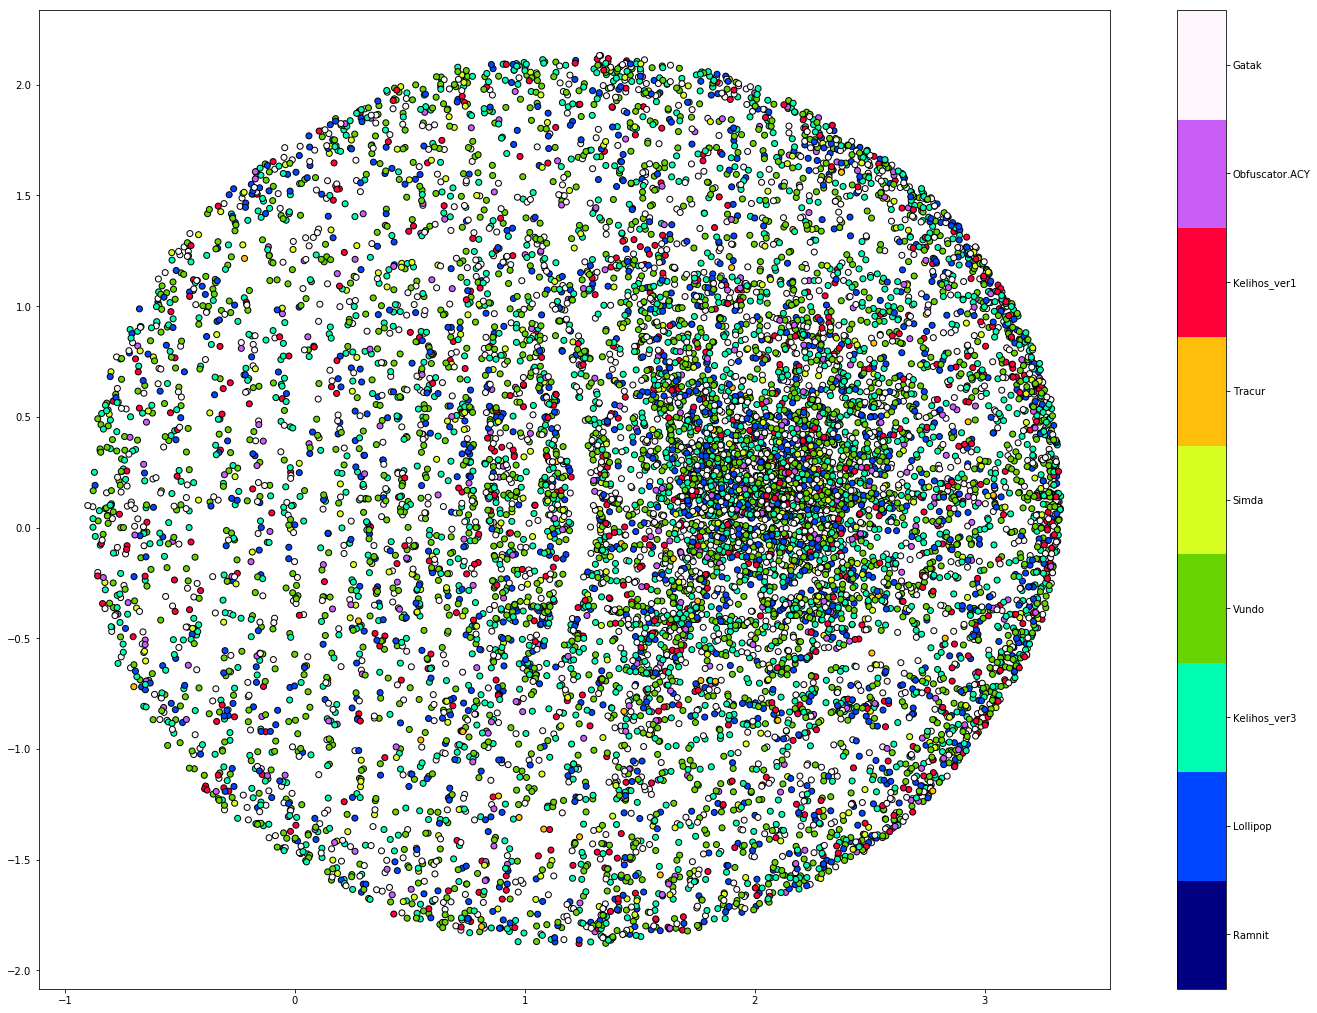

In [21]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=y, cmap=plt.cm.get_cmap("gist_ncar", len(list_fams)),edgecolors="black")
plt.clim(-0.5, len(list_fams)-0.5)
cbar = plt.colorbar(ticks=range(len(list_fams)))
cbar.ax.set_yticklabels(list_fams)                     
plt.show()

In [21]:
# Create stratified k-fold subsets                                                                                                                                        
kfold = 10  # no. of folds                                                                 
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0                                              
for index in skf.split(X, y):         
    skfind[cnt] = index                                                 
    cnt += 1 

In [26]:
# Training top_model and saving min training loss weights
conf_mat = np.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = tfidf[train_indices]
    y_train = y[train_indices]
    X_test = tfidf[test_indices]
    y_test = y[test_indices]
    
    top_model = svm.LinearSVC()
    top_model.fit(X_train,y_train)  # Training
    y_pred = top_model.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_pred)))
    cm = confusion_matrix(y_test,y_pred)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

[0] Test acurracy: 0.2701
[1] Test acurracy: 0.2706
[2] Test acurracy: 0.2702
[3] Test acurracy: 0.2705
[4] Test acurracy: 0.2705
[5] Test acurracy: 0.2707
[6] Test acurracy: 0.2707
[7] Test acurracy: 0.2707
[8] Test acurracy: 0.2715
[9] Test acurracy: 0.2715


In [27]:
# Computing the average accuracy
avg_acc = np.trace(conf_mat)/sum(no_imgs)
print("Average acurracy: %.4f" %(avg_acc))

Average acurracy: 0.2707


In [28]:
# Viewing the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix

Plotting the confusion matrix


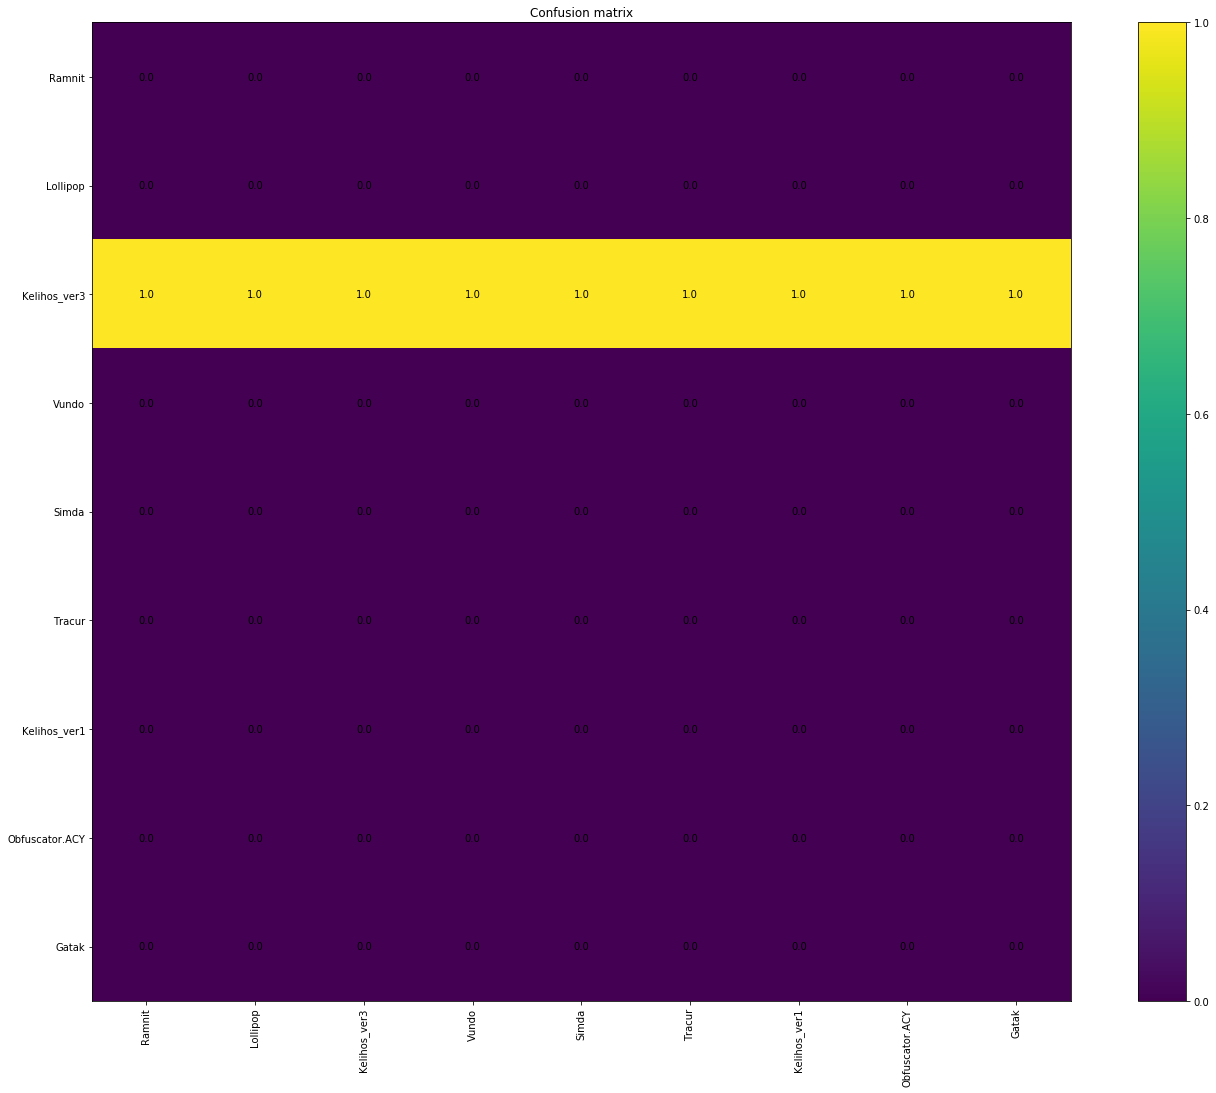

In [29]:
print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()